In [1]:
import generator

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# No outliers

We start by generating a test timeseries with `period=24`, `amplitude=25` and observation `error=20` and a starting `mean=200`.

We will generate a week's worth of hourly points, that is `N=24*7` points.

This data will not have any artificial outliers.

In [6]:
N = 24*7

data = [generator.generate_step(t=t, period=24, amplitude=25, error=20, mean=200) for t in range(N)]

We now create a Pandas dataframe to hold the data and add a timestamp (starting from `now`) for each value.

In [7]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})
df.head(n=10)

,x,ds,y
0,0,2022-06-27 10:11:35.760652,214.256622
1,1,2022-06-27 11:11:35.760652,221.153483
2,2,2022-06-27 12:11:35.760652,221.633137
3,3,2022-06-27 13:11:35.760652,218.624048
4,4,2022-06-27 14:11:35.760652,238.392310
5,5,2022-06-27 15:11:35.760652,235.244927
6,6,2022-06-27 16:11:35.760652,235.034723
7,7,2022-06-27 17:11:35.760652,227.241477
8,8,2022-06-27 18:11:35.760652,240.096746
9,9,2022-06-27 19:11:35.760652,223.630291


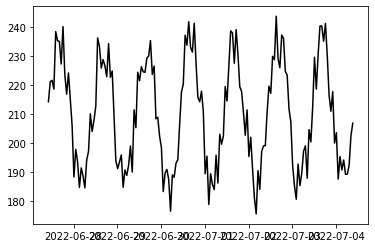

In [8]:
plt.plot(df.ds, df.y, c="k")

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from alibi_detect.od import OutlierProphet
from alibi_detect.utils.fetching import fetch_detector
from alibi_detect.utils.saving import save_detector, load_detector

We instantiate a `fbprophet` outlier detector with a high threshold.

In [17]:
od = OutlierProphet(threshold=.95, changepoint_prior_scale=1.0)

In [18]:
od.fit(df[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.47342
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       549.899   0.000830471       11.4269      0.4842      0.4842      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       550.204   0.000529102       33.8999      0.4024      0.4024      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       550.266   5.02944e-05       10.1828    1.87e-05       0.001      386  LS failed, Hessian reset 
     299       550.272   0.000556025       7.28251           1           1      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     383       550.325   1.63022e-05       6.44444   3.703e-06       0.001      554  LS failed, Hessian reset 
     399       550.326   0.000473589       9.35361           1           1      572   
    Iter      log pro

In [19]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [20]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier

In [21]:
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

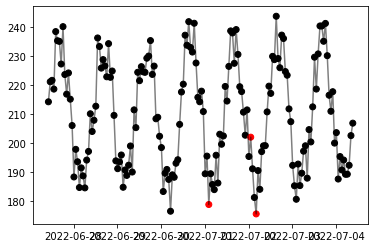

In [22]:
plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

# Outliers

In [23]:
anomaly_times=[10, 27, 83, 128]
for t in anomaly_times:
    data[t] *= 1.25

In [24]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})

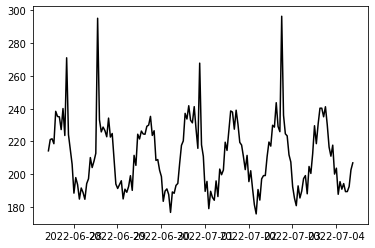

In [25]:
plt.plot(df.ds, df.y, c="k")

In [26]:
od = OutlierProphet(threshold=.95)

In [27]:
od.fit(df[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -2.43157
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       479.507   6.56133e-05       68.0205   8.742e-07       0.001      133  LS failed, Hessian reset 
      99        479.51    9.4591e-07       69.6634      0.1349      0.5197      190   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115        479.51    2.2208e-06       77.5646   2.717e-08       0.001      256  LS failed, Hessian reset 
     130        479.51   1.26439e-08       57.8242       0.204       0.204      278   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [28]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [29]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

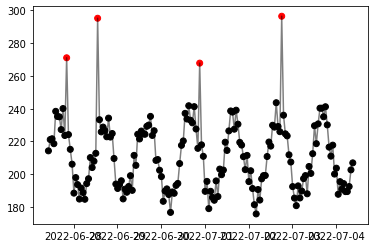

In [30]:
plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

# Testing

In [31]:
now = pd.Timestamp.now()

In [32]:
result = od.predict(pd.DataFrame(data={"ds":[now], "y":[200]}))
result['data']['is_outlier']

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,is_outlier
0,2022-06-27 10:13:15.767911,0


In [33]:
result = od.predict(pd.DataFrame(data={"ds":[now], "y":[250]}))
result['data']['is_outlier']

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,is_outlier
0,2022-06-27 10:13:15.767911,1


# "Real" data

We will now generate data corresponding to an observation for each second, for a day.

The data will have a daily seasonality.

In [68]:
N = 60 * 60 * 24 # seconds * minutes * hours

data = [generator.generate_step(t=t, period=N, amplitude=0.1, error=100, mean=200) for t in range(N)]

In [69]:
df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1s'),
    'y': data
})
df.head(n=10)

,x,ds,y
0,0,2022-06-27 10:36:53.293191,275.986049
1,1,2022-06-27 10:36:54.293191,289.048149
2,2,2022-06-27 10:36:55.293191,241.212731
3,3,2022-06-27 10:36:56.293191,243.637416
4,4,2022-06-27 10:36:57.293191,211.065593
5,5,2022-06-27 10:36:58.293191,293.483767
6,6,2022-06-27 10:36:59.293191,258.791277
7,7,2022-06-27 10:37:00.293191,256.344675
8,8,2022-06-27 10:37:01.293191,287.605386
9,9,2022-06-27 10:37:02.293191,290.392906


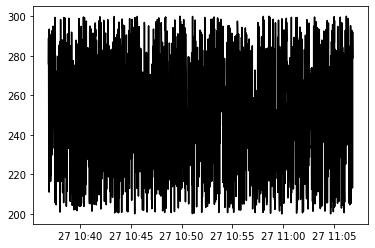

In [70]:
plt.plot(df.ds[0:1800], df.y[0:1800], c="k")

In [71]:
od = OutlierProphet(threshold=.95)

In [72]:
od.fit(df[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -625.315
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        159300   0.000266554       84.5344           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        159301   0.000220481       173.853           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        159301   3.73219e-05       75.5488      0.4236           1      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        159302   3.96565e-05       131.771      0.8381      0.8381      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     493        159302   7.98972e-06       97.7056      0.8674      0.8674      626   
Optimization terminated normally: 
  Convergence detected: relat

In [73]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

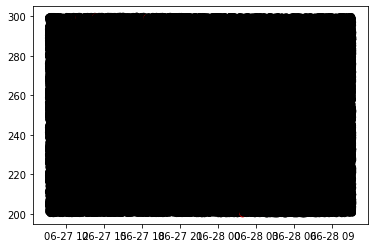

In [74]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

Add artificial outliers for testing.

Add 100 artificial values at random timepoints.

In [75]:
anomaly_times= np.random.randint(0, high=N, size=100)
for t in anomaly_times:
    data[t] *= 1.1

df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1s'),
    'y': data
})

In [76]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

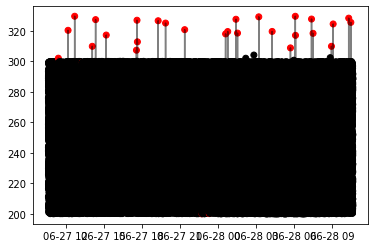

In [77]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

## Saving the model

In [78]:
from alibi_detect.utils.saving import save_detector

save_detector(detector=od, filepath="./model")